# Using the Brier score to evaluate the predictive ability of a time-to-event model

References:
- [scikit-survival docs - Evaluating survival models](https://scikit-survival.readthedocs.io/en/stable/user_guide/evaluating-survival-models.html#Time-dependent-Brier-Score)
    - Discusses the bias of Harrell's c-index, and the fact that it is not a useful measure of performance if a specific time range is of primary interest (e.g. predicting death within 2 years) 
    - Time-dependent AUC: most relevant if we want to predict occurrence of an event in a period up to time t (rather than at a specific time t). Note that this only measures discrimination, not calibration.  
    - Time-dependent Brier score: can be used to assess both calibration and discrimination 


Todo:
- Models:
  - M1: null model that takes in X and returns 0.5 for every case
  - M2: perfect model that takes in X and passes it to the known Weibull survival
      function to get true survival probabilities (or 1-surv_prob if we want a risk
      score)
  - M3: intermediate model that passes to very similar Weibull params, but not exact
  - M4: KM model "learned" from training data
- set up functions for generating the data and splitting into train/test
- Evaluate models M1-M4 on test data


In [1]:
%%capture
!pip install scikit-survival

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sksurv.functions import StepFunction
from sksurv.datasets import load_gbsg2
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import encode_categorical 

In [3]:
RANDOM_STATE = 2020 

In [4]:
gbsg2_X, gbsg2_y = load_gbsg2()
gbsg2_X = encode_categorical(gbsg2_X)

df_train_X, df_test_X, df_train_y, df_test_y = (
    train_test_split(
        gbsg2_X, gbsg2_y,
        stratify=gbsg2_y['cens'], 
        test_size=.20, 
        random_state=RANDOM_STATE
    )
)

In [5]:
assert len(df_train_X) == 548
assert len(df_test_X) == 138

In [6]:
pd.Series(df_train_y['cens']).value_counts(normalize=True)

False    0.563869
True     0.436131
Name: proportion, dtype: float64

In [7]:
pd.Series(df_test_y['cens']).value_counts(normalize=True)

False    0.565217
True     0.434783
Name: proportion, dtype: float64

In [8]:
pd.DataFrame(df_train_y).head()

,cens,time
0,True,372.0
1,True,371.0
2,False,1434.0
3,True,1730.0
4,False,2401.0


# Models

In [9]:
m01_km = kaplan_meier_estimator(df_train_y['cens'], df_train_y['time'], conf_type='log-log')
m01_time, m01_prob, m01_conf_limits = m01_km

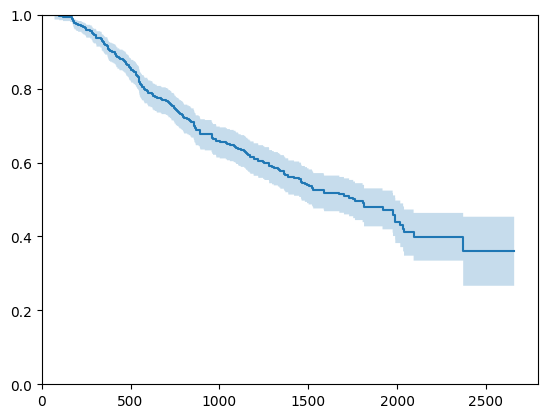

In [10]:
plt.step(x=m01_time, y=m01_prob, where='post')
plt.fill_between(m01_time, m01_conf_limits[0], m01_conf_limits[1], alpha=.25, step='post')
plt.ylim(0, 1)
plt.xlim(0,)
plt.show()